# Part I: the Housing Prices

Predicting the Sale Prices of Houses based on a dataset obtained from Kaggle.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Question 1
Loading the train and test data.

In [2]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We'll split the train data into a train dataset and a validation dataset.

In [3]:
from sklearn.model_selection import train_test_split


X = train_df.drop(columns = ['SalePrice']).copy()
y = train_df['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8)


print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)

(1168, 80)
(1168,)
(292, 80)
(292,)


(None, None)

In [4]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
227,228,160,RM,21.0,1869,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
1172,1173,160,FV,35.0,4017,Pave,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
472,473,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1060,1061,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1008,160,RM,21.0,2217,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
921,922,90,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal
745,746,60,RL,NaN,8963,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1367,1368,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal


## Question 2

Examples of categorical features:


*   MSSubClass: The building class
*   Functional: Home functionality rating
*   Heating: Type of heating

Examples of continuous features:


*   1stFlrSF: First Floor square feet
*   GrLivArea: Above grade (ground) living area square feet
*   SalePrice - the property's sale price in dollars


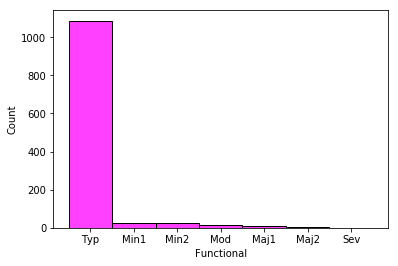

In [5]:
def plot_histogram(df, attr, colour):
    sns.histplot(data=df, x=attr, color=colour)
    
# Plotting the histogram for the attribute Functional
plot_histogram(X_train, "Functional", "magenta")

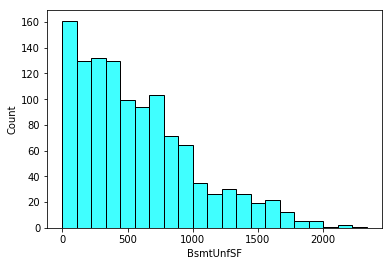

In [6]:
# Plotting the histogram for BsmtUnfSF
plot_histogram(X_train, "BsmtUnfSF", "cyan")

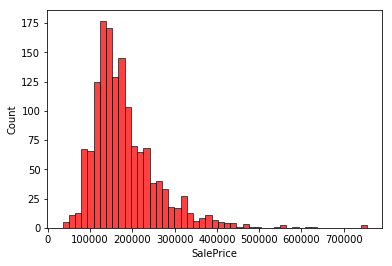

In [7]:
# Plotting the histogram for Sale Price, the goal to be predicted
plot_histogram(train_df, "SalePrice", "red")

# Question 3: Pre-Processing

1. Remove missing values
2. Normalise numerical values
3. Look at correlation and perform feature engineering



In [8]:
# Creating a new empty dataframe
missing_df = pd.DataFrame()
missing_df["Feature"] = X_train.columns

# Calculating the percentage of the missing values for each attribute
missing = ((X_train.isnull().sum() / len(X_train)) * 100).values
missing_df["Missing"] = missing
missing_df = missing_df[missing_df["Feature"] != "SalePrice"]
missing_df = missing_df[missing_df["Missing"] != 0]
missing_df = missing_df.sort_values(by="Missing", ascending=False)
    
missing_df

,Feature,Missing
72,PoolQC,99.400685
74,MiscFeature,95.976027
6,Alley,93.578767
73,Fence,80.650685
57,FireplaceQu,47.517123
3,LotFrontage,17.722603
58,GarageType,5.736301
59,GarageYrBlt,5.736301
60,GarageFinish,5.736301
63,GarageQual,5.736301


In [9]:
# Defining a function to note down the columns to be removed, which have more than 50% of its values missing

def missing(df):
    
    attributes = df.loc[df['Missing'] > 50 ]
    
    return list(attributes['Feature'])

to_remove = missing(missing_df)

def remove_missing(df, to_remove):
    
    return df.drop(columns=to_remove)


We then separate numerical and categorical attributes. Then we perform data pre-processing according to each attribute and its characteristics. Firstly, we plot all features to make sense of the data.

In [10]:
numerical_attr = X_train.dtypes[X_train.dtypes != "object"].index
categorical_attr = X_train.dtypes[X_train.dtypes == "object"].index

categorical_attr

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

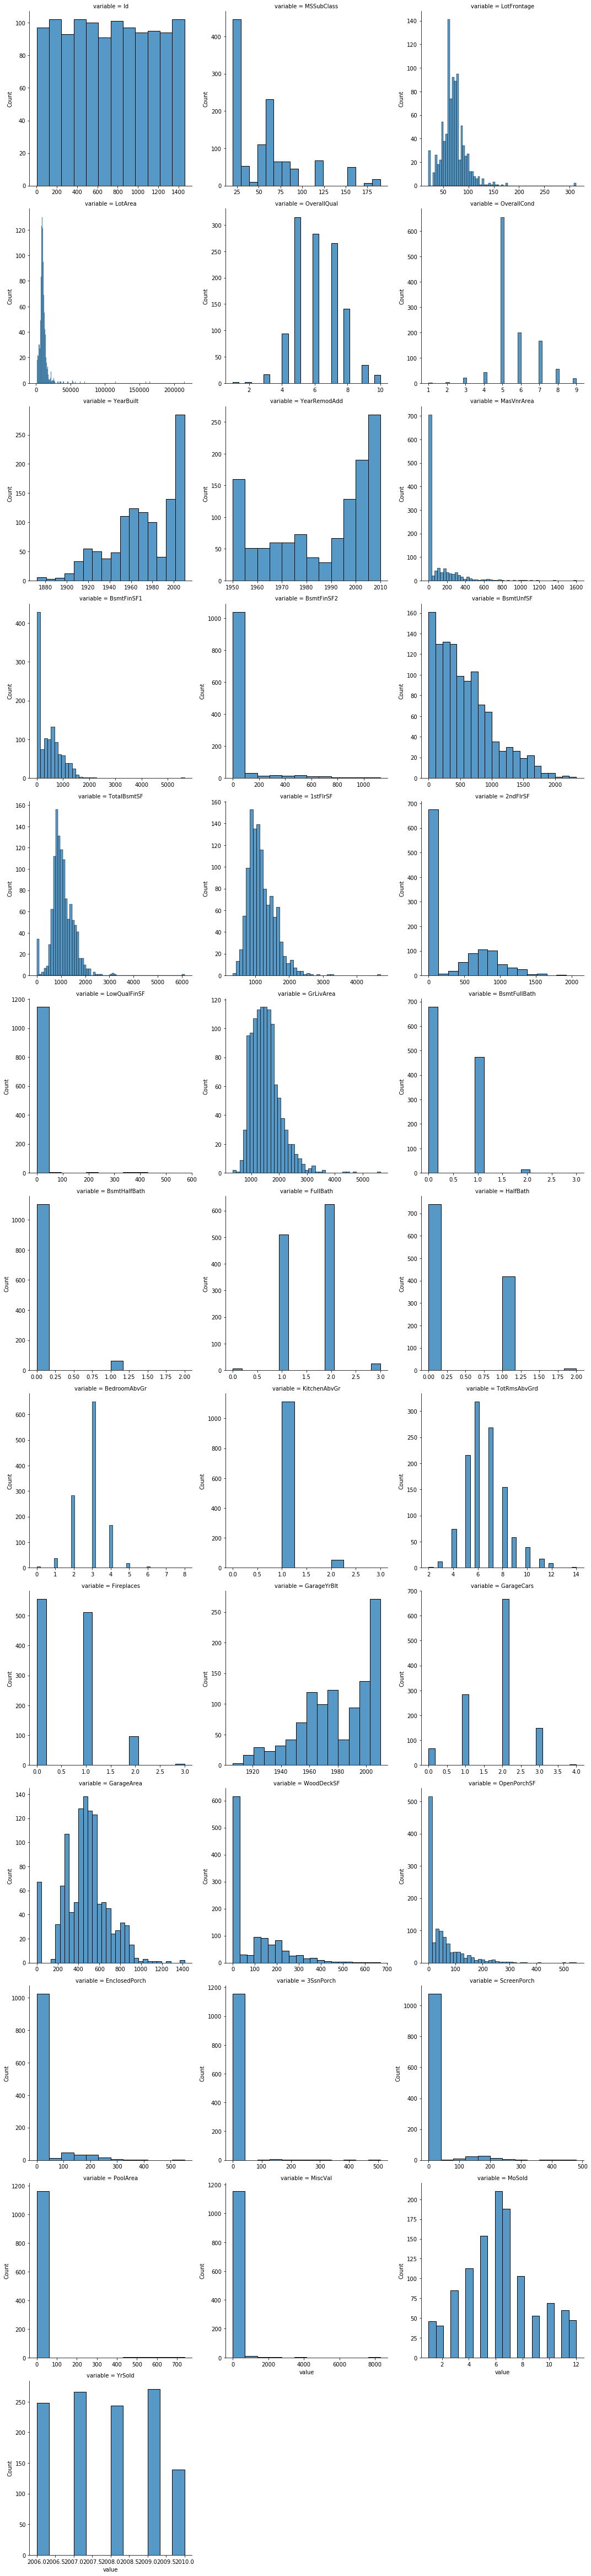

In [50]:
# Plotting numerical features

fig = pd.melt(X_train, value_vars=numerical_attr)
a1 = sns.FacetGrid(fig, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5, palette="Set1")
a1 = a1.map(sns.histplot, "value")
plt.show()
a1.savefig("numerical.png")

/Users/eylul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


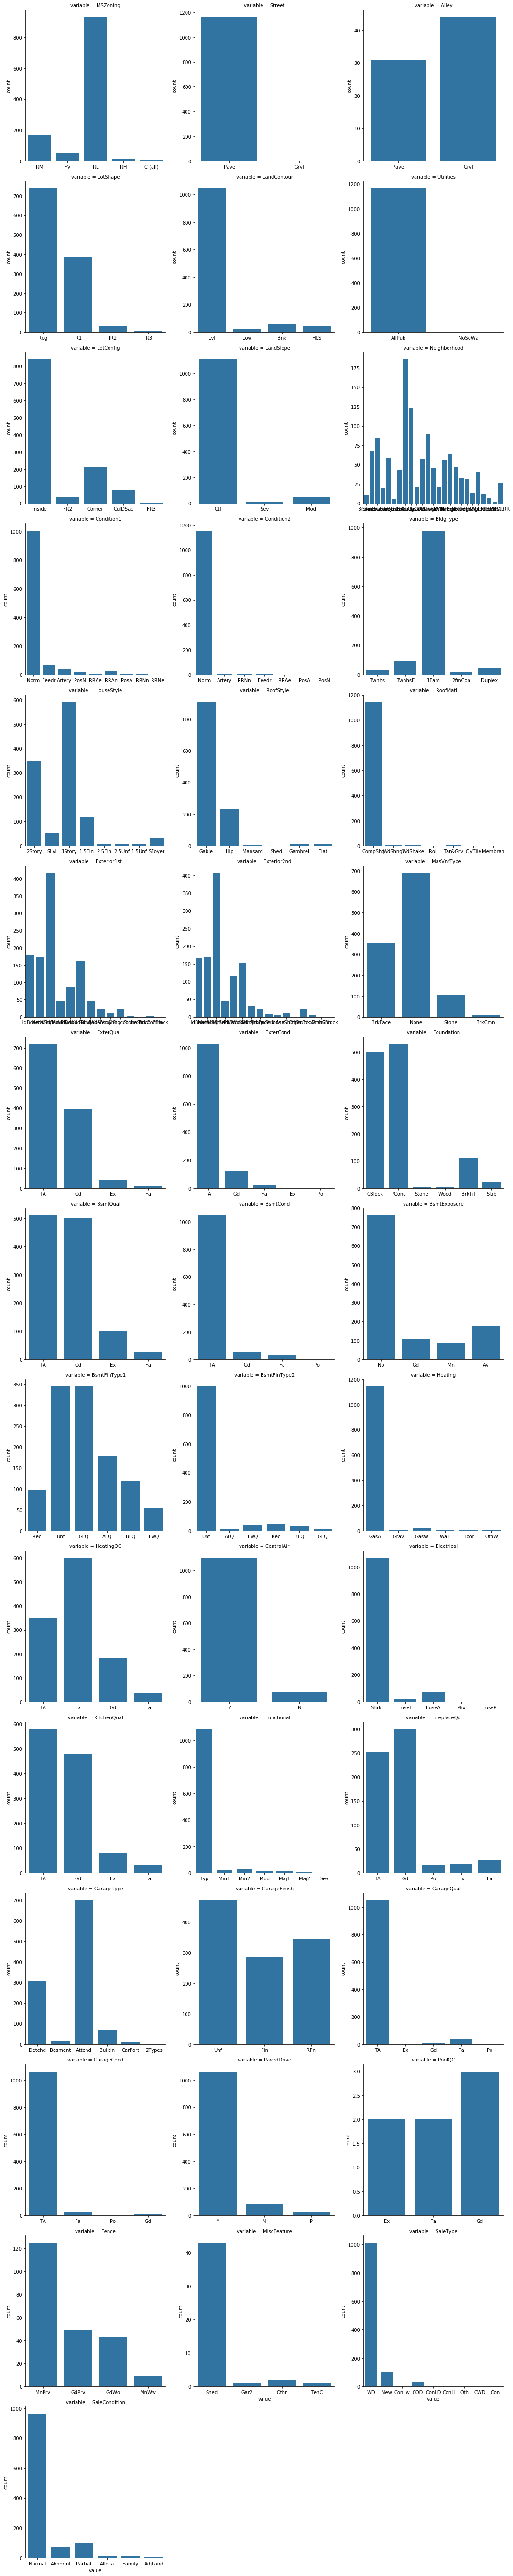

In [51]:
# Plotting categorical features

fig = pd.melt(X_train, value_vars=categorical_attr)
a1 = sns.FacetGrid(fig, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5, palette="Set3")
a1 = a1.map(sns.countplot, "value")
plt.show()
a1.savefig("categorical.png")

We create 2 different dataframes for numerical and categorical attributes to perform pre-processing on them separately.

In [13]:
df_numerical = X_train[numerical_attr]
df_categorical = X_train[categorical_attr]

df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Numerical Features

Looking at the above visualisations, we can make assumptions about which attributes will be more useful, or which attributes we should normalise/modify/drop. Firstly, among the numerical features, we do not want to normalise attributes such as "Year". We can see from the plots that some of the attributes do not offer much information about the dataset because one their values are mostly the same. Therefore we can drop the following attributes:

* MasVnrArea
* BsmtFinSF2

We want to normalise attributes that do not have a Gaussian distrubition. We will also normalise all atrributes depicting area in square foot.

### Categorical Features

Features to drop:

* Utilities
* RoofStyle
* RoofMatl
* BsmtCond
* BsmtFinType2
* GarageCond
* GarageQual
* PavedDrive

We want to One-Hot Encode features that have common values, and features that can offer information about Sale Price. From the plots, we can see that features such as Neighborhood, CentralAir, PoolQC, LandSlope, BsmtQual fit these criteria, therefore we can one-hot encode them.

In [14]:
to_normalise = ["MSSubClass", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]
other_numerical = list(set(numerical_attr) - set(to_normalise))
other_numerical

['LotFrontage',
 'KitchenAbvGr',
 'Fireplaces',
 'BsmtHalfBath',
 'Id',
 'BedroomAbvGr',
 'OverallCond',
 'BsmtFullBath',
 'MiscVal',
 'BsmtFinSF2',
 'YearBuilt',
 'LotArea',
 'FullBath',
 'HalfBath',
 'GarageYrBlt',
 'YrSold',
 'MoSold',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'YearRemodAdd',
 'OverallQual',
 'GarageCars']

In [15]:
numerical_norm = df_numerical[to_normalise]
numerical_rest = df_numerical[other_numerical]
numerical_norm

,MSSubClass,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
227,160,321,162,483,483,504,0,987,280,0,0,0,0,0,0
1172,160,0,625,625,625,625,0,1250,625,0,54,0,0,0,0
472,180,459,88,547,1072,0,0,1072,525,0,28,0,0,0,0
1060,120,616,722,1338,1338,0,0,1338,582,0,0,170,0,0,0
24,20,188,204,1060,1060,0,0,1060,270,406,90,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,160,273,0,546,546,546,0,1092,286,238,0,0,0,0,0
921,90,1084,188,1272,1272,928,0,2200,0,0,70,0,0,0,0
745,60,575,487,1142,1175,1540,0,2715,831,0,204,0,0,0,0
1367,160,548,36,757,925,550,0,1475,336,104,26,0,0,0,0


We already moved columns with more than 50% of its values missing. For the rest of the missing values, we replace them with the mean of that specific attribute.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Using SimpleImputer to replace the missing values with the attributes' means
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
numerical_norm = imputer.fit_transform(numerical_norm)
numerical_rest = imputer.fit_transform(numerical_rest)


# To normalise the numerical attributes, we use StandardScaler
scaler = StandardScaler()
numerical_norm = scaler.fit_transform(numerical_norm)

numerical_norm = pd.DataFrame(numerical_norm, columns = to_normalise)
numerical_rest = pd.DataFrame(numerical_rest, columns = other_numerical )

numerical_norm

,MSSubClass,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,2.533660,-0.269860,-0.918919,-1.289458,-1.752866,0.369773,-0.120472,-1.003903,-0.911905,-0.765372,-0.713589,-0.351404,-0.099728,-0.268805,-0.076845
1,2.533660,-0.956960,0.115825,-0.976170,-1.393773,0.645390,-0.120472,-0.511760,0.710684,-0.765372,0.084841,-0.351404,-0.099728,-0.268805,-0.076845
2,3.019650,0.025528,-1.084299,-1.148258,-0.263388,-0.778253,-0.120472,-0.844845,0.240368,-0.765372,-0.299589,-0.351404,-0.099728,-0.268805,-0.076845
3,1.561680,0.361586,0.332607,0.596890,0.409280,-0.778253,-0.120472,-0.347089,0.508448,-0.765372,-0.713589,2.464480,-0.099728,-0.268805,-0.076845
4,-0.868270,-0.554546,-0.825055,-0.016449,-0.293733,-0.778253,-0.120472,-0.867300,-0.958936,2.620597,0.617128,-0.351404,-0.099728,-0.268805,-0.076845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2.533660,-0.372604,-1.280968,-1.150464,-1.593550,0.465442,-0.120472,-0.807420,-0.883686,1.219506,-0.713589,-0.351404,-0.099728,-0.268805,-0.076845
1164,0.832695,1.363339,-0.860813,0.451277,0.242378,1.335573,-0.120472,1.265940,-2.228788,-0.765372,0.321413,-0.351404,-0.099728,-0.268805,-0.076845
1165,0.103710,0.273826,-0.192587,0.164464,-0.002919,2.729605,-0.120472,2.229641,1.679534,-0.765372,2.302702,-0.351404,-0.099728,-0.268805,-0.076845
1166,2.533660,0.216033,-1.200513,-0.684944,-0.635125,0.474553,-0.120472,-0.090726,-0.648528,0.101970,-0.329160,-0.351404,-0.099728,-0.268805,-0.076845


In [17]:
# For the categorical attributes, we replace the missing values by the most frequent value in a column using SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_categorical)

df_categorical = imputer.transform(df_categorical)
df_categorical = pd.DataFrame(df_categorical, columns = categorical_attr)

df_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Detchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Basment,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1164,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,...,Attchd,Unf,TA,TA,N,Gd,GdPrv,Shed,WD,Normal
1165,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,BuiltIn,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1166,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [18]:
# Merging the normalised numerical dataframe with the untouched features

df_numerical = numerical_norm.join(numerical_rest, how="inner")

# Merging the categorical and numerical dataframes
merged = df_numerical.join(df_categorical, how="inner")
merged

,MSSubClass,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2.533660,-0.269860,-0.918919,-1.289458,-1.752866,0.369773,-0.120472,-1.003903,-0.911905,-0.765372,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2.533660,-0.956960,0.115825,-0.976170,-1.393773,0.645390,-0.120472,-0.511760,0.710684,-0.765372,...,Detchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3.019650,0.025528,-1.084299,-1.148258,-0.263388,-0.778253,-0.120472,-0.844845,0.240368,-0.765372,...,Basment,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,1.561680,0.361586,0.332607,0.596890,0.409280,-0.778253,-0.120472,-0.347089,0.508448,-0.765372,...,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,-0.868270,-0.554546,-0.825055,-0.016449,-0.293733,-0.778253,-0.120472,-0.867300,-0.958936,2.620597,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2.533660,-0.372604,-1.280968,-1.150464,-1.593550,0.465442,-0.120472,-0.807420,-0.883686,1.219506,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1164,0.832695,1.363339,-0.860813,0.451277,0.242378,1.335573,-0.120472,1.265940,-2.228788,-0.765372,...,Attchd,Unf,TA,TA,N,Gd,GdPrv,Shed,WD,Normal
1165,0.103710,0.273826,-0.192587,0.164464,-0.002919,2.729605,-0.120472,2.229641,1.679534,-0.765372,...,BuiltIn,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1166,2.533660,0.216033,-1.200513,-0.684944,-0.635125,0.474553,-0.120472,-0.090726,-0.648528,0.101970,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


We also want to map a correlation matrix to see which attributes are highly correlated with SalePrice. Linear regression models assume that there is little or no multicollinearity in the data.

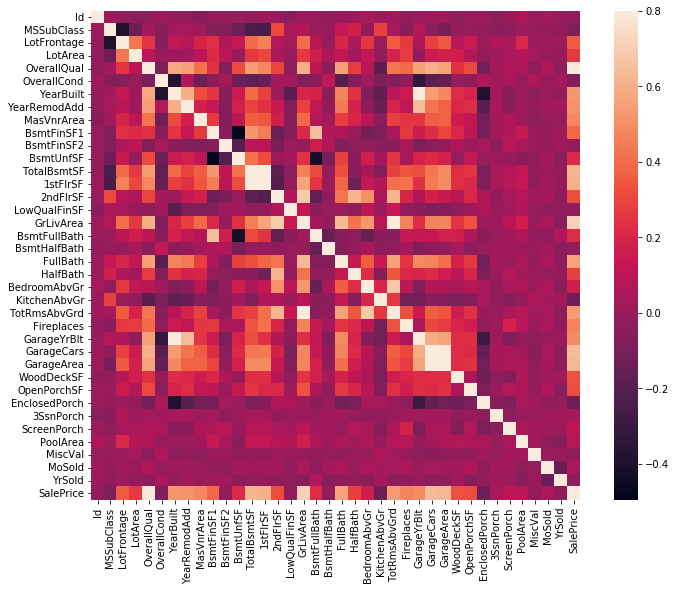

In [52]:
# Plotting the correlation matrix

corr = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);
plt.show()
fig.savefig("corr.png")

In [20]:
# Let's get the most correlated attributes.

correlations = corr['SalePrice'].sort_values(ascending=False).to_frame()
correlations

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


We can drop the values that have a negative correlation and a correlation value lower than 0.3. 

In [21]:
to_drop = list(correlations[correlations['SalePrice'] < 0.3].index)
to_drop_cat = ["Utilities", "RoofStyle", "RoofMatl", "BsmtCond", "BsmtFinType2", "GarageCond", "GarageQual", "PavedDrive"]


to_drop.remove('Id')
to_drop = to_drop + to_remove + to_drop_cat
to_drop

['HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr',
 'PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'Utilities',
 'RoofStyle',
 'RoofMatl',
 'BsmtCond',
 'BsmtFinType2',
 'GarageCond',
 'GarageQual',
 'PavedDrive']

In [22]:
# Now removing all columns that we have picked 

merged = merged.drop(columns=to_drop)

merged

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,Fireplaces,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,-0.269860,-1.289458,-1.752866,0.369773,-1.003903,-0.911905,-0.765372,-0.713589,21.000000,0.0,...,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,WD,Normal
1,-0.956960,-0.976170,-1.393773,0.645390,-0.511760,0.710684,-0.765372,0.084841,35.000000,0.0,...,Ex,Y,SBrkr,Gd,Typ,Gd,Detchd,Fin,WD,Normal
2,0.025528,-1.148258,-0.263388,-0.778253,-0.844845,0.240368,-0.765372,-0.299589,35.000000,0.0,...,Ex,Y,SBrkr,TA,Typ,Gd,Basment,RFn,WD,Normal
3,0.361586,0.596890,0.409280,-0.778253,-0.347089,0.508448,-0.765372,-0.713589,41.000000,0.0,...,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,WD,Normal
4,-0.554546,-0.016449,-0.293733,-0.778253,-0.867300,-0.958936,2.620597,0.617128,70.300728,1.0,...,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.372604,-1.150464,-1.593550,0.465442,-0.807420,-0.883686,1.219506,-0.713589,21.000000,0.0,...,TA,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,WD,Normal
1164,1.363339,0.451277,0.242378,1.335573,1.265940,-2.228788,-0.765372,0.321413,67.000000,0.0,...,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,WD,Normal
1165,0.273826,0.164464,-0.002919,2.729605,2.229641,1.679534,-0.765372,2.302702,70.300728,2.0,...,Ex,Y,SBrkr,Gd,Typ,TA,BuiltIn,Fin,WD,Normal
1166,0.216033,-0.684944,-0.635125,0.474553,-0.090726,-0.648528,0.101970,-0.329160,41.000000,1.0,...,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,WD,Normal


# Question 4: One-Hot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

# As we mentioned above, we will be one hot encoding the following attributes:
 #CentralAir
 #LandSlope
 #BsmtQual 


# Generate binary values using get_dummies
dum_df = pd.get_dummies(merged, columns=["CentralAir"])
# merge with main df bridge_df on key values
dum_df

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,Fireplaces,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition,CentralAir_N,CentralAir_Y
0,-0.269860,-1.289458,-1.752866,0.369773,-1.003903,-0.911905,-0.765372,-0.713589,21.000000,0.0,...,SBrkr,TA,Typ,Gd,Detchd,Unf,WD,Normal,0,1
1,-0.956960,-0.976170,-1.393773,0.645390,-0.511760,0.710684,-0.765372,0.084841,35.000000,0.0,...,SBrkr,Gd,Typ,Gd,Detchd,Fin,WD,Normal,0,1
2,0.025528,-1.148258,-0.263388,-0.778253,-0.844845,0.240368,-0.765372,-0.299589,35.000000,0.0,...,SBrkr,TA,Typ,Gd,Basment,RFn,WD,Normal,0,1
3,0.361586,0.596890,0.409280,-0.778253,-0.347089,0.508448,-0.765372,-0.713589,41.000000,0.0,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,WD,Normal,0,1
4,-0.554546,-0.016449,-0.293733,-0.778253,-0.867300,-0.958936,2.620597,0.617128,70.300728,1.0,...,SBrkr,Gd,Typ,TA,Attchd,Unf,WD,Normal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.372604,-1.150464,-1.593550,0.465442,-0.807420,-0.883686,1.219506,-0.713589,21.000000,0.0,...,SBrkr,TA,Typ,Gd,Attchd,RFn,WD,Normal,0,1
1164,1.363339,0.451277,0.242378,1.335573,1.265940,-2.228788,-0.765372,0.321413,67.000000,0.0,...,SBrkr,TA,Typ,Gd,Attchd,Unf,WD,Normal,0,1
1165,0.273826,0.164464,-0.002919,2.729605,2.229641,1.679534,-0.765372,2.302702,70.300728,2.0,...,SBrkr,Gd,Typ,TA,BuiltIn,Fin,WD,Normal,0,1
1166,0.216033,-0.684944,-0.635125,0.474553,-0.090726,-0.648528,0.101970,-0.329160,41.000000,1.0,...,SBrkr,TA,Typ,TA,Attchd,RFn,WD,Normal,0,1


AttributeError: 'NoneType' object has no attribute 'savefig'

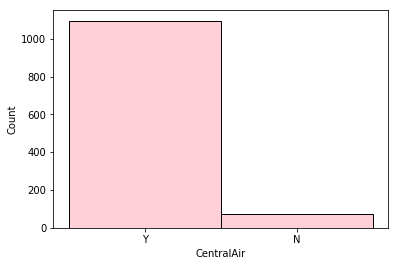

In [54]:
# Plotting the histogram for CentralAir before OHE

plot_histogram(merged, "CentralAir", "pink")


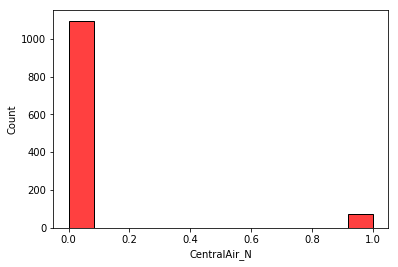

In [25]:
# Plotting the histogram for CentralAir after OHE

plot_histogram(dum_df,"CentralAir_N", "red")

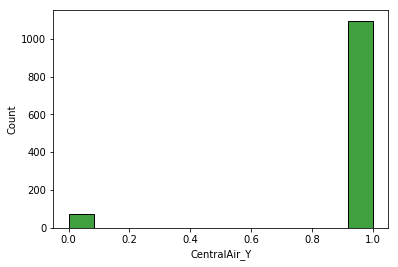

In [26]:
plot_histogram(dum_df,"CentralAir_Y", "green")

In [27]:
# We will label encode the rest of the categorical values

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
encoded_df = dum_df.apply(le.fit_transform)

encoded_df

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,Fireplaces,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition,CentralAir_N,CentralAir_Y
0,108,10,3,43,83,33,0,0,0,0,...,4,3,6,2,5,2,8,4,0,1
1,0,38,20,92,219,249,0,41,6,0,...,4,2,6,2,5,0,8,4,0,1
2,182,22,247,0,117,180,0,17,6,0,...,4,3,6,2,2,1,8,4,0,1
3,271,421,411,0,257,219,0,0,12,0,...,4,2,6,2,1,0,8,4,0,1
4,46,272,238,0,111,28,217,73,42,1,...,4,2,6,4,1,2,8,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,84,21,8,58,127,38,140,0,0,0,...,4,3,6,2,1,1,8,4,0,1
1164,454,395,378,233,635,0,0,57,38,0,...,4,3,6,2,1,2,8,4,0,1
1165,250,323,323,341,710,345,0,147,42,2,...,4,2,6,4,3,0,8,4,0,1
1166,230,102,151,61,327,61,43,15,12,1,...,4,3,6,4,1,1,8,4,0,1


# Question 5: OLS

In [28]:
theta_best = np.linalg.inv(encoded_df.T.dot(encoded_df)).dot(encoded_df.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=encoded_df.columns)
theta_best_df

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,Fireplaces,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition,CentralAir_N,CentralAir_Y
0,51.296195,36.218191,65.604691,156.718675,-4.02627,32.789575,46.680541,-6.972081,47.217525,8236.575238,...,-162.020143,-9094.053585,3781.998819,-2029.694619,864.788976,-1681.498092,-504.027619,3051.914272,60919.835957,68870.797989


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    
    # Remove missing values
    missing_df = pd.DataFrame()
    missing_df["Feature"] = train_df.columns

    # Calculating the percentage of the missing values for each attribute
    missing = ((train_df.isnull().sum() / len(train_df)) * 100).values
    missing_df["Missing"] = missing
    missing_df = missing_df[missing_df["Missing"] != 0]
    missing_df = missing_df.sort_values(by="Missing", ascending=False)
    
    attributes = missing_df.loc[missing_df['Missing'] > 50 ]
    to_remove = list(attributes['Feature'])
    
    df = remove_missing(df, to_remove)
    
    # Separate numerical - categorical
    numerical_attr = df.dtypes[df.dtypes != "object"].index
    categorical_attr = df.dtypes[df.dtypes == "object"].index
    
    df_numerical = df[numerical_attr]
    df_categorical = df[categorical_attr]

    to_normalise = ["MSSubClass", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]
    other_numerical = list(set(numerical_attr) - set(to_normalise))
    numerical_norm = df_numerical[to_normalise]
    numerical_rest = df_numerical[other_numerical]
    

    # Using SimpleImputer to replace the missing values with the attributes' means
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
    numerical_norm = imputer.fit_transform(numerical_norm)
    numerical_rest = imputer.fit_transform(numerical_rest)


    # To normalise the numerical attributes, we use StandardScaler
    scaler = StandardScaler()
    numerical_norm = scaler.fit_transform(numerical_norm)

    numerical_norm = pd.DataFrame(numerical_norm, columns = to_normalise)
    numerical_rest = pd.DataFrame(numerical_rest, columns = other_numerical )
    
    # For the categorical attributes, we replace the missing values by the most frequent value in a column using SimpleImputer

    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(df_categorical)

    df_categorical = imputer.transform(df_categorical)
    df_categorical = pd.DataFrame(df_categorical, columns = categorical_attr)
    
    # Merging the normalised numerical dataframe with the untouched features

    df_numerical = numerical_norm.join(numerical_rest, how="inner")

    # Merging the categorical and numerical dataframes
    merged = df_numerical.join(df_categorical, how="inner")    

    # Drop unnecessary columns
    
    to_drop = ['HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','Utilities','RoofStyle','RoofMatl','BsmtCond','BsmtFinType2','GarageCond','GarageQual','PavedDrive']
    
    merged = merged.drop(columns=to_drop)
    
    final_df = pd.get_dummies(merged, columns=["CentralAir"])
    
    # Label Encode
    le = preprocessing.LabelEncoder()
    final_df = final_df.apply(le.fit_transform)
    
    return final_df

In [55]:
valid_processed = preprocess(X_valid)
test_processed = preprocess(test_df)


In [32]:
# Generate predictions on the new prices
y_valid_pred = valid_processed.dot(theta_best)
y_test_pred = test_processed.dot(theta_best)

y_test_pred

0       116045.056802
1       183226.499495
2       188935.273259
3       203624.869608
4       200240.188527
            ...      
1454     49196.617385
1455     49786.906855
1456    186743.961672
1457    118115.459901
1458    281044.019108
Length: 1459, dtype: float64

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(y_valid, y_valid_pred)


0.4817966893920168

In [57]:
mean_squared_error(y_valid, y_valid_pred)

2532109742.5113893

In [33]:
test_df['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [35]:
df = pd.concat([test_df['Id'], y_test_pred], axis=1)
df = df.rename(columns={0: "SalePrice"})
df

,Id,SalePrice
0,1461,116045.056802
1,1462,183226.499495
2,1463,188935.273259
3,1464,203624.869608
4,1465,200240.188527
...,...,...
1454,2915,49196.617385
1455,2916,49786.906855
1456,2917,186743.961672
1457,2918,118115.459901


In [46]:
df.to_csv('house.csv', index=False)

In [43]:
df

,Id,SalePrice
0,1461,116045.056802
1,1462,183226.499495
2,1463,188935.273259
3,1464,203624.869608
4,1465,200240.188527
...,...,...
1454,2915,49196.617385
1455,2916,49786.906855
1456,2917,186743.961672
1457,2918,118115.459901
